In [ ]:
#PREDICT EURO Value againtes other foriegn currency exhange rates


In [8]:
#import required libraries
import numpy as np
import pandas as pd

import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#import data set
forex_data = pd.read_csv('/content/ECB_FX_USD-quote.csv')
forex_data.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,#date,#value+eur,#value+jpy,#value+bgn,#value+czk,#value+dkk,#value+gbp,#value+huf,#value+pln,#value+ron,...,#value+ils,#value+inr,#value+krw,#value+mxn,#value+myr,#value+nzd,#value+php,#value+sgd,#value+thb,#value+zar
1,2022-05-20,1.0577,0.007815132259494607,0.5408017179670723,0.04287393595460073,0.1421181339352897,1.2469936335769867,0.00276212362572794,0.22812466300010786,0.2137760979849223,...,0.299377299745259,0.012873394781266699,0.0007889868564352744,0.05029146894643248,0.22784455646029902,0.6403317592928927,0.01916782950653305,0.7250479846449136,0.029150589791643703,0.06328568607858506
2,2022-05-19,1.0525,0.007827606723189051,0.5381429594028019,0.04261133603238867,0.14142133480241323,1.2422103672929845,0.002727885338102273,0.2267195140339918,0.21273800379997573,...,0.2954551834488954,0.012880683869467578,0.0007835707000394576,0.05010878724832534,0.22701291978517352,0.6359132378708235,0.01908777656873413,0.7220773874862788,0.028960184904933548,0.06253156284347801
3,2022-05-18,1.0523,0.007751178550383029,0.5380406994580224,0.0426948513003611,0.14140206130154934,1.2428250856265501,0.002748380693689929,0.2265788170445492,0.2127018777919269,...,0.29844015882019287,0.012888646649233577,0.0007895645127404784,0.05030018546490507,0.22750464824663813,0.6359076625574087,0.019105978902264103,0.7208521715303466,0.028910134893815765,0.06289409669302445
4,2022-05-17,1.0541,0.007732541079812207,0.538961038961039,0.042655390093881515,0.14165345230736154,1.2489336492890997,0.0027287082578307015,0.22674668731715714,0.21304418125227376,...,0.29787775171673214,0.012909744462747164,0.0007903813565676409,0.05013006900553091,0.22810586224059207,0.636495380713725,0.019117833759544407,0.7225306737953252,0.02898985176425291,0.06258014723343623


In [10]:
#Remove First Row
forex_data =  forex_data.drop(0)


In [11]:
forex_data.head()

,Date,EUR,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
1,2022-05-20,1.0577,0.007815132259494607,0.5408017179670723,0.04287393595460073,0.1421181339352897,1.2469936335769867,0.00276212362572794,0.22812466300010786,0.2137760979849223,...,0.299377299745259,0.012873394781266699,0.0007889868564352744,0.05029146894643248,0.22784455646029902,0.6403317592928927,0.01916782950653305,0.7250479846449136,0.029150589791643703,0.06328568607858506
2,2022-05-19,1.0525,0.007827606723189051,0.5381429594028019,0.04261133603238867,0.14142133480241323,1.2422103672929845,0.002727885338102273,0.2267195140339918,0.21273800379997573,...,0.2954551834488954,0.012880683869467578,0.0007835707000394576,0.05010878724832534,0.22701291978517352,0.6359132378708235,0.01908777656873413,0.7220773874862788,0.028960184904933548,0.06253156284347801
3,2022-05-18,1.0523,0.007751178550383029,0.5380406994580224,0.0426948513003611,0.14140206130154934,1.2428250856265501,0.002748380693689929,0.2265788170445492,0.2127018777919269,...,0.29844015882019287,0.012888646649233577,0.0007895645127404784,0.05030018546490507,0.22750464824663813,0.6359076625574087,0.019105978902264103,0.7208521715303466,0.028910134893815765,0.06289409669302445
4,2022-05-17,1.0541,0.007732541079812207,0.538961038961039,0.042655390093881515,0.14165345230736154,1.2489336492890997,0.0027287082578307015,0.22674668731715714,0.21304418125227376,...,0.29787775171673214,0.012909744462747164,0.0007903813565676409,0.05013006900553091,0.22810586224059207,0.636495380713725,0.019117833759544407,0.7225306737953252,0.02898985176425291,0.06258014723343623
5,2022-05-16,1.0422,0.007719428190504408,0.532876572246651,0.042177256171590446,0.1400467628799484,1.2254688694220706,0.0027010496306854996,0.22328869844670593,0.2106773939234672,...,0.2937926368607994,0.012853812853812853,0.0007789819866955677,0.04978884408858993,0.22737586176804261,0.6277935064152762,0.019051275020564848,0.7172252425848187,0.028731322710481337,0.06159756493986229


<Figure size 864x576 with 0 Axes>

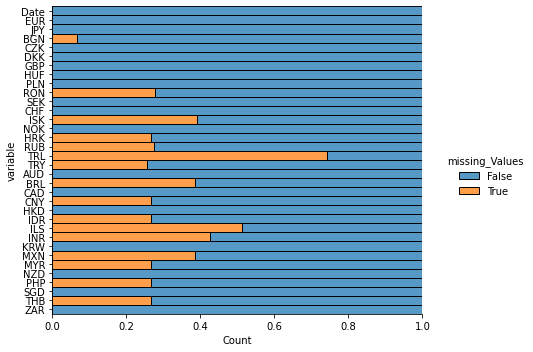

In [16]:
#Plot data to indentify missing values 
plt.figure(figsize=(12,8))
sns.displot(data=forex_data.isna().melt(value_name="missing_Values"), y="variable",hue="missing_Values",multiple="fill",aspect=1.25)
plt.savefig("visualizing_missing_data.png", dpi=100)
